# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

current_dir = os.path.realpath('.')
training_file = os.path.join(current_dir, 'traffic_sign_data/train.p')
validation_file = os.path.join(current_dir, 'traffic_sign_data/valid.p')
testing_file = os.path.join(current_dir, 'traffic_sign_data/test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

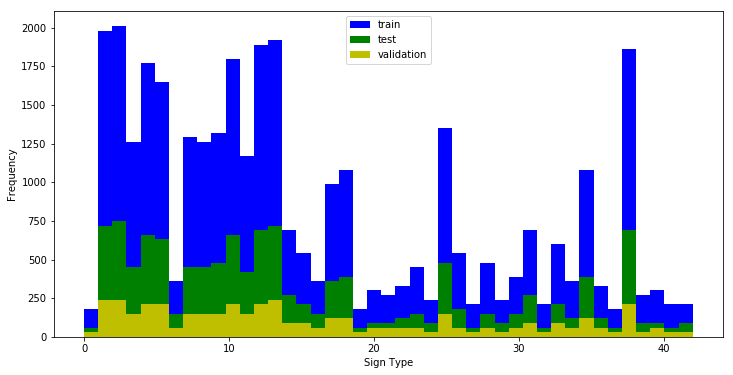

Random sample from training set


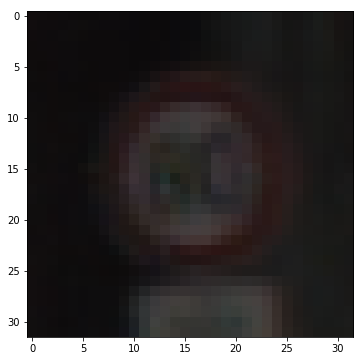

5


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

plt.figure(figsize=(12, 6))
plt.hist(y_train, bins=43, color='b', label='train')
plt.hist(y_test, bins=43, color='g', label='test')
plt.hist(y_valid, bins=43, color='y', label='validation')
plt.xlabel('Sign Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Random sample from training set')
import random
rand_index = random.randint(0, len(X_train))

plt.figure(figsize=(12, 6))
plt.imshow(X_train[rand_index], aspect='1')
plt.show()
print(y_train[rand_index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

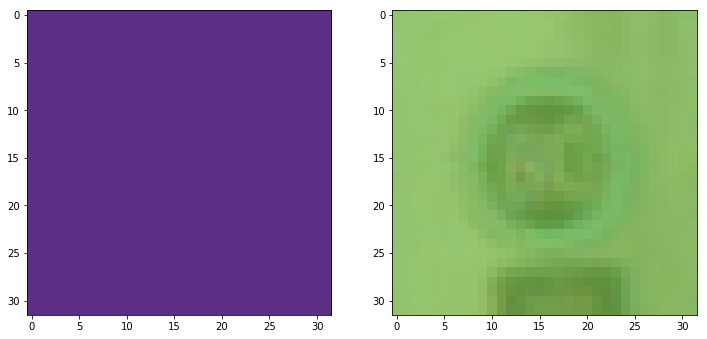

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np
from sklearn.utils import shuffle

# Zero center images by subtracting mean pixel value for each color channel in training dataset
X_train_mean = np.mean(X_train, axis=(0, 1, 2)) # 3x1 vector of mean values for each channel
X_train = X_train - X_train_mean
X_valid = X_valid - X_train_mean
X_test =  X_test - X_train_mean

# Confirm that each color channel is zero centered
# X_train_norm_mean = np.mean(X_train, axis=(0, 1, 2))
# if np.abs(X_train_norm_mean).any() > np.finfo(np.float32).eps:
#     print(X_train_norm_mean)
#     print('Input images are not zero centered.')

x_mean_image = np.tile(X_train_mean, (32, 32, 1))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(x_mean_image, interpolation='nearest', aspect='1')
ax2.imshow(X_train[rand_index], aspect='1')  # TODO: figure out how it is scaling pixel values (negatives)
plt.show()

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [5]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

keep_prob = tf.placeholder(tf.float32)

In [ ]:
def myArch(x):    
    conv1_W = tf.get_variable("conv1_W", shape=[3, 3, 3, 64],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    conv2_W = tf.get_variable("conv2_W", shape=[3, 3, 64, 64],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    conv3_W = tf.get_variable("conv3_W", shape=[3, 3, 64, 128],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    conv4_W = tf.get_variable("conv4_W", shape=[3, 3, 128, 128],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv4_b = tf.Variable(tf.zeros(128))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    conv4 = tf.nn.relu(conv4)
    
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    conv5_W = tf.get_variable("conv5_W", shape=[3, 3, 128, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv5_b = tf.Variable(tf.zeros(256))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    conv5 = tf.nn.relu(conv5)
    
    conv6_W = tf.get_variable("conv6_W", shape=[3, 3, 256, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv6_b = tf.Variable(tf.zeros(256))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    conv6 = tf.nn.relu(conv6)
    
    conv7_W = tf.get_variable("conv7_W", shape=[3, 3, 256, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv7_b = tf.Variable(tf.zeros(256))
    conv7   = tf.nn.conv2d(conv6, conv7_W, strides=[1, 1, 1, 1], padding='SAME') + conv7_b
    conv7 = tf.nn.relu(conv7)
    
    conv7 = tf.nn.max_pool(conv7, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    fc0 = flatten(conv7)
    
    fc1_W = tf.get_variable("fc1_W", shape=[4096, 2048],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN',
                                                                                       uniform=False))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b  
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    fc2_W = tf.get_variable("fc2_W", shape=[2048, 2048],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN', 
                                                                                       uniform=False))
    fc2_b  = tf.Variable(tf.zeros(2048))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    fc3_W = tf.get_variable("fc3_W", shape=[2048, 1024],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN',
                                                                                       uniform=False))
    fc3_b  = tf.Variable(tf.zeros(1024))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    fc4_W = tf.get_variable("fc4_W", shape=[1024, 43],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN',
                                                                                       uniform=False))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits    = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [6]:
def leNet(x):  
    mu = 0
    sigma = 0.05
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    fc0   = flatten(conv2)
    

    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 140), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(140))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(140, 80), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(80))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)


    fc3_W  = tf.Variable(tf.truncated_normal(shape=(80, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits

In [ ]:
def vggNet(x):    
    conv1_W = tf.get_variable("conv1_W", shape=[3, 3, 3, 64],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    conv2_W = tf.get_variable("conv2_W", shape=[3, 3, 64, 64],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    conv3_W = tf.get_variable("conv3_W", shape=[3, 3, 64, 128],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    conv4_W = tf.get_variable("conv4_W", shape=[3, 3, 128, 128],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv4_b = tf.Variable(tf.zeros(128))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    conv4 = tf.nn.relu(conv4)
    
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    conv5_W = tf.get_variable("conv5_W", shape=[3, 3, 128, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv5_b = tf.Variable(tf.zeros(256))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    conv5 = tf.nn.relu(conv5)
    
    conv6_W = tf.get_variable("conv6_W", shape=[3, 3, 256, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv6_b = tf.Variable(tf.zeros(256))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    conv6 = tf.nn.relu(conv6)
    
    conv7_W = tf.get_variable("conv7_W", shape=[3, 3, 256, 256],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv7_b = tf.Variable(tf.zeros(256))
    conv7   = tf.nn.conv2d(conv6, conv7_W, strides=[1, 1, 1, 1], padding='SAME') + conv7_b
    conv7 = tf.nn.relu(conv7)
    
    conv7 = tf.nn.max_pool(conv7, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    conv8_W = tf.get_variable("conv8_W", shape=[3, 3, 256, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv8_b = tf.Variable(tf.zeros(512))
    conv8   = tf.nn.conv2d(conv7, conv8_W, strides=[1, 1, 1, 1], padding='SAME') + conv8_b
    conv8 = tf.nn.relu(conv8)
    
    conv9_W = tf.get_variable("conv9_W", shape=[3, 3, 512, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv9_b = tf.Variable(tf.zeros(512))
    conv9   = tf.nn.conv2d(conv8, conv9_W, strides=[1, 1, 1, 1], padding='SAME') + conv9_b
    conv9 = tf.nn.relu(conv9)
    
    conv10_W = tf.get_variable("conv10_W", shape=[3, 3, 512, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv10_b = tf.Variable(tf.zeros(512))
    conv10   = tf.nn.conv2d(conv9, conv10_W, strides=[1, 1, 1, 1], padding='SAME') + conv10_b
    conv10 = tf.nn.relu(conv10)
    
    conv10 = tf.nn.max_pool(conv10, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    
    conv11_W = tf.get_variable("conv11_W", shape=[3, 3, 512, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv11_b = tf.Variable(tf.zeros(512))
    conv11   = tf.nn.conv2d(conv10, conv11_W, strides=[1, 1, 1, 1], padding='SAME') + conv11_b
    conv11 = tf.nn.relu(conv11)
    
    
    conv12_W = tf.get_variable("conv12_W", shape=[3, 3, 512, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv12_b = tf.Variable(tf.zeros(512))
    conv12   = tf.nn.conv2d(conv11, conv12_W, strides=[1, 1, 1, 1], padding='SAME') + conv12_b
    conv12 = tf.nn.relu(conv12)
    
    conv13_W = tf.get_variable("conv13_W", shape=[3, 3, 512, 512],
                              initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                         mode='FAN_IN',
                                                                                         uniform=False))
    conv13_b = tf.Variable(tf.zeros(512))
    conv13   = tf.nn.conv2d(conv12, conv13_W, strides=[1, 1, 1, 1], padding='SAME') + conv13_b
    conv13 = tf.nn.relu(conv13)
    
    conv13 = tf.nn.max_pool(conv13, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    fc0 = flatten(conv13)
    
    fc1_W = tf.get_variable("fc1_W", shape=[25088, 4096],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN',
                                                                                       uniform=False))
    fc1_b = tf.Variable(tf.zeros(4096))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b  
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    fc2_W = tf.get_variable("fc2_W", shape=[4096, 4096],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN', 
                                                                                       uniform=False))
    fc2_b  = tf.Variable(tf.zeros(4096))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    fc3_W = tf.get_variable("fc3_W", shape=[4096, 43],
                            initializer=tf.contrib.layers.variance_scaling_initializer(factor=2.0,
                                                                                       mode='FAN_IN',
                                                                                       uniform=False))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits    = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
EPOCHS = 100
BATCH_SIZE = 256
LEARN_RATE = 0.0002
DROPOUT_KEEP = 0.5

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [9]:
logits = leNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
saver = tf.train.Saver()

<IPython.core.display.Javascript object>


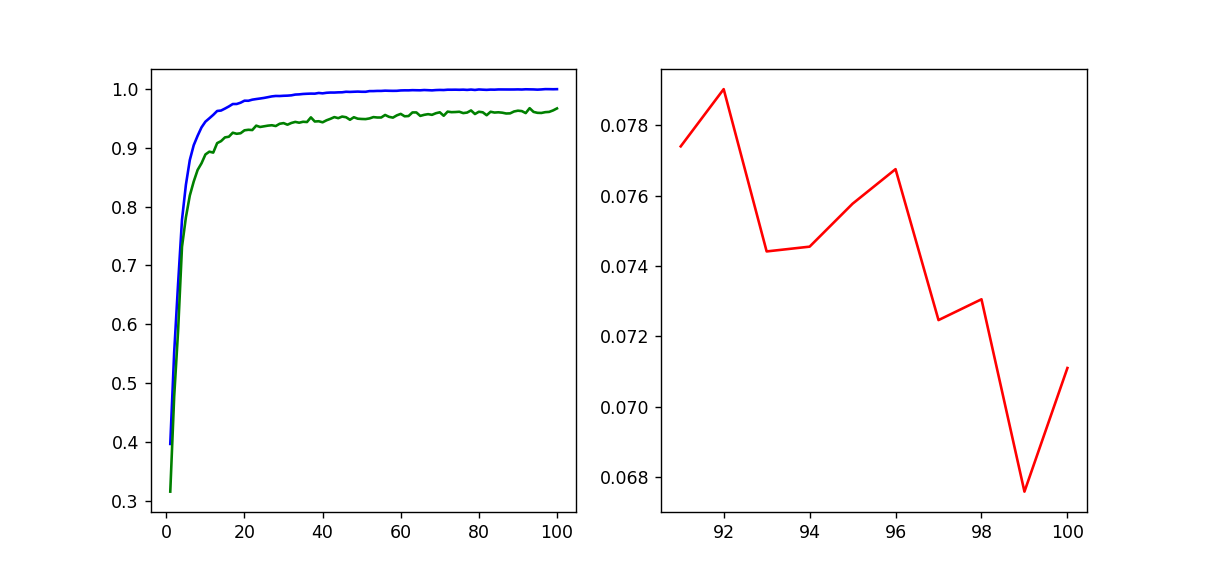

Training...

EPOCH 1 ...
Training Accuracy = 0.397
Validation Accuracy = 0.316
Average loss = 3.4294940
Time: 3.030

EPOCH 2 ...
Training Accuracy = 0.552
Validation Accuracy = 0.477
Average loss = 2.4634416
Time: 2.600

EPOCH 3 ...
Training Accuracy = 0.669
Validation Accuracy = 0.588
Average loss = 1.8564575
Time: 2.588

EPOCH 4 ...
Training Accuracy = 0.778
Validation Accuracy = 0.732
Average loss = 1.4720468
Time: 2.584

EPOCH 5 ...
Training Accuracy = 0.837
Validation Accuracy = 0.782
Average loss = 1.2052101
Time: 2.584

EPOCH 6 ...
Training Accuracy = 0.879
Validation Accuracy = 0.819
Average loss = 1.0273705
Time: 2.592

EPOCH 7 ...
Training Accuracy = 0.904
Validation Accuracy = 0.842
Average loss = 0.8848615
Time: 2.580

EPOCH 8 ...
Training Accuracy = 0.920
Validation Accuracy = 0.862
Average loss = 0.7883437
Time: 2.588

EPOCH 9 ...
Training Accuracy = 0.934
Validation Accuracy = 0.873
Average loss = 0.7006561
Time: 2.571

EPOCH 10 ...
Training Accuracy = 0.944
Validation A

EPOCH 79 ...
Training Accuracy = 0.998
Validation Accuracy = 0.957
Average loss = 0.0878630
Time: 2.567

EPOCH 80 ...
Training Accuracy = 0.999
Validation Accuracy = 0.961
Average loss = 0.0892138
Time: 2.561

EPOCH 81 ...
Training Accuracy = 0.999
Validation Accuracy = 0.960
Average loss = 0.0885351
Time: 2.575

EPOCH 82 ...
Training Accuracy = 0.998
Validation Accuracy = 0.955
Average loss = 0.0824547
Time: 2.580

EPOCH 83 ...
Training Accuracy = 0.999
Validation Accuracy = 0.961
Average loss = 0.0810785
Time: 2.574

EPOCH 84 ...
Training Accuracy = 0.999
Validation Accuracy = 0.960
Average loss = 0.0855391
Time: 2.561

EPOCH 85 ...
Training Accuracy = 0.999
Validation Accuracy = 0.960
Average loss = 0.0844352
Time: 2.566

EPOCH 86 ...
Training Accuracy = 0.999
Validation Accuracy = 0.959
Average loss = 0.0826931
Time: 2.568

EPOCH 87 ...
Training Accuracy = 0.999
Validation Accuracy = 0.958
Average loss = 0.0823557
Time: 2.579

EPOCH 88 ...
Training Accuracy = 0.999
Validation Accur

In [12]:
%matplotlib nbagg
import time, math
from IPython import display
from collections import deque

LOSS_GRAPH_HIST = 10  # num epochs

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    train_acc_hist = []
    valid_acc_hist = []
    batches_per_epoch = math.ceil(num_examples / BATCH_SIZE)
    average_loss_hist = []
    
    total_time = 0.0
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.set_autoscale_on(True)
    ax2.set_autoscale_on(True)
    f.canvas.draw()
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        loss_hist = []
        start_epoch_time = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss_val = sess.run([training_operation, loss_operation],
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT_KEEP})
            loss_hist.append(loss_val)
        
        epoch_time = time.time() - start_epoch_time
        total_time += epoch_time
        train_acc_hist.append(evaluate(X_train, y_train))
        valid_acc_hist.append(evaluate(X_valid, y_valid))
        average_epoch_loss = sum(loss_hist) / batches_per_epoch
        average_loss_hist.append(average_epoch_loss)
        
        if i:
            if len(ax1.lines):
                ax1.lines[0].set_xdata(range(1, i+2))
                ax1.lines[0].set_ydata(train_acc_hist)
                ax1.lines[1].set_xdata(range(1, i+2))
                ax1.lines[1].set_ydata(valid_acc_hist)
                ax1.relim()
                ax1.autoscale_view()
            else:
                ax1.plot(range(1, i+2), train_acc_hist, '-b', label='train')
                ax1.plot(range(1, i+2), valid_acc_hist, '-g', label='valid')
                
            if len(ax2.lines):
                ax2.lines[0].set_xdata(range(max(1, i-(LOSS_GRAPH_HIST-2)), i+2))
                ax2.lines[0].set_ydata(average_loss_hist[-min(LOSS_GRAPH_HIST, len(average_loss_hist)):])
                ax2.relim()
                ax2.autoscale_view()
            else:
                ax2.plot(range(1, i+2), average_loss_hist, '-r', label='loss')

        f.canvas.draw()

        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_acc_hist[-1]))        
        print("Validation Accuracy = {:.3f}".format(valid_acc_hist[-1]))
        print("Average loss = {:.7f}".format(average_epoch_loss))
        print("Time: {:.3f}".format(epoch_time))
        print()
        
    print("Total Time: {:.3f}".format(total_time))
    print("Average Time: {:.3f}".format(total_time / EPOCHS))
    
    saver.save(sess, './lenet')
    print("Model saved")

In [14]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
from scipy import misc

web_image_dir = os.path.join(current_dir, 'downloaded_sign_images/')

dl_images = []
dl_types = []
for file in os.listdir(web_image_dir):
    if file.endswith('.png'):
        dl_types.append(int(file.strip('.png')))
        dl_images.append(misc.imread(os.path.join(web_image_dir, file), mode='RGB'))      

X_dl = np.array(dl_images)
y_dl = np.array(dl_types)
X_dl_processed = X_dl - X_train_mean

### Predict the Sign Type for Each Image

In [16]:
import csv
reader = csv.reader(open('signnames.csv'))

sign_id_to_name = {}
for row in reader:
    sign_id_to_name[int(row[0])] = row[1]

1:


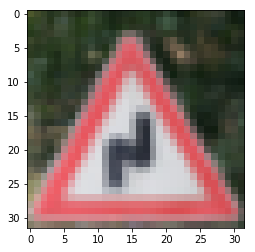

Predicted: Right-of-way at the next intersection (1.000)
Actual: Double curve


2:


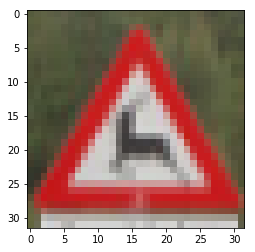

Predicted: Wild animals crossing (1.000)
Actual: Wild animals crossing


3:


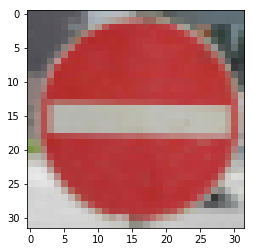

Predicted: No entry (1.000)
Actual: No entry


4:


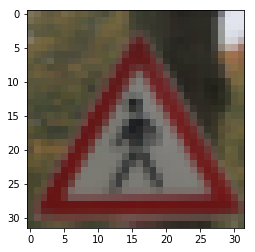

Predicted: Pedestrians (0.995)
Actual: Pedestrians


5:


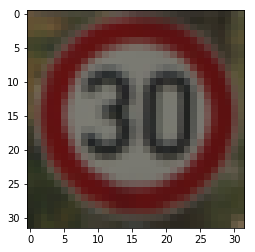

Predicted: Speed limit (30km/h) (1.000)
Actual: Speed limit (30km/h)


6:


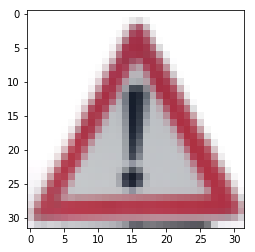

Predicted: General caution (1.000)
Actual: General caution


7:


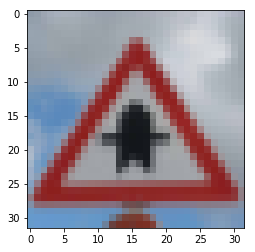

Predicted: Right-of-way at the next intersection (1.000)
Actual: Right-of-way at the next intersection


8:


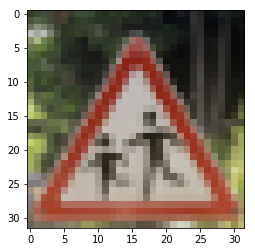

Predicted: Children crossing (1.000)
Actual: Children crossing




In [17]:
%matplotlib inline
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, './lenet')

    image_id_probs = sess.run(tf.nn.softmax(logits),
                              feed_dict={x: X_dl_processed, y: y_dl, keep_prob: 1.0})
    predictions = image_id_probs.argmax(axis=1)
    for i in range(len(X_dl)):
        print('{}:'.format(i + 1))
        plt.imshow(X_dl[i], aspect='1')
        plt.show()
        print("Predicted: {} ({:.3f})".format(sign_id_to_name[predictions[i]],
                                              image_id_probs[i][predictions[i]]))
        print("Actual:", sign_id_to_name[y_dl[i]])
        print('\n')

### Analyze Performance

In [18]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_dl_processed, y_dl)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
with tf.Session() as sess:
    top5 = sess.run(tf.nn.top_k(tf.constant(image_id_probs), k=5))
    for i in range(len(X_dl)):
        print('{}:'.format(i + 1))
        for p in range(5):
            print('  {} -- {:0.5f}'.format(sign_id_to_name[top5[1][i][p]], top5[0][i][p]))
        print()


1:
  Right-of-way at the next intersection -- 0.99987
  Pedestrians -- 0.00010
  Children crossing -- 0.00002
  Beware of ice/snow -- 0.00002
  End of all speed and passing limits -- 0.00000

2:
  Wild animals crossing -- 1.00000
  Slippery road -- 0.00000
  Double curve -- 0.00000
  Right-of-way at the next intersection -- 0.00000
  Beware of ice/snow -- 0.00000

3:
  No entry -- 1.00000
  Stop -- 0.00000
  Traffic signals -- 0.00000
  Speed limit (70km/h) -- 0.00000
  Priority road -- 0.00000

4:
  Pedestrians -- 0.99541
  General caution -- 0.00311
  Right-of-way at the next intersection -- 0.00145
  Road narrows on the right -- 0.00003
  Traffic signals -- 0.00000

5:
  Speed limit (30km/h) -- 0.99994
  Speed limit (50km/h) -- 0.00005
  Speed limit (80km/h) -- 0.00001
  Speed limit (20km/h) -- 0.00000
  Speed limit (70km/h) -- 0.00000

6:
  General caution -- 1.00000
  Traffic signals -- 0.00000
  Pedestrians -- 0.00000
  Dangerous curve to the right -- 0.00000
  Speed limit (20km/

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")